Found 7640 images belonging to 100 classes.
Found 1860 images belonging to 100 classes.
Classes: ['air hockey', 'ampute football', 'archery', 'arm wrestling', 'axe throwing', 'balance beam', 'barell racing', 'baseball', 'basketball', 'baton twirling', 'bike polo', 'billiards', 'bmx', 'bobsled', 'bowling', 'boxing', 'bull riding', 'bungee jumping', 'canoe slamon', 'cheerleading', 'chuckwagon racing', 'cricket', 'croquet', 'curling', 'disc golf', 'fencing', 'field hockey', 'figure skating men', 'figure skating pairs', 'figure skating women', 'fly fishing', 'football', 'formula 1 racing', 'frisbee', 'gaga', 'giant slalom', 'golf', 'hammer throw', 'hang gliding', 'harness racing', 'high jump', 'hockey', 'horse jumping', 'horse racing', 'horseshoe pitching', 'hurdles', 'hydroplane racing', 'ice climbing', 'ice yachting', 'jai alai', 'javelin', 'jousting', 'judo', 'lacrosse', 'log rolling', 'luge', 'motorcycle racing', 'mushing', 'nascar racing', 'olympic wrestling', 'parallel bar', 'pole cl

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        51,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,967,204 (11.32 MB)

 Trainable params: 708,196 (2.70 MB)

 Non-trainable params: 2,259,008 (8.62 MB)

Epoch 1/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 134s 549ms/step - accuracy: 0.2053 - loss: 3.7130 - val_accuracy: 0.5661 - val_loss: 1.6391 - learning_rate: 0.0010
Epoch 2/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 127s 531ms/step - accuracy: 0.5516 - loss: 1.7063 - val_accuracy: 0.6226 - val_loss: 1.4243 - learning_rate: 0.0010
Epoch 3/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 130s 542ms/step - accuracy: 0.6055 - loss: 1.4531 - val_accuracy: 0.6425 - val_loss: 1.2866 - learning_rate: 0.0010
Epoch 4/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 127s 532ms/step - accuracy: 0.6397 - loss: 1.3130 - val_accuracy: 0.6726 - val_loss: 1.1989 - learning_rate: 0.0010
Epoch 5/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 153s 640ms/step - accuracy: 0.6661 - loss: 1.1870 - val_accuracy: 0.6677 - val_loss: 1.2105 - learning_rate: 0.0010
Epoch 6/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 134s 562ms/step - accuracy: 0.6793 - loss: 1.1544 - val_accuracy: 0.6790 - val_loss: 1.1795 - learning_rate: 0.0010
Epoch 7/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 145s 607ms/step - accura

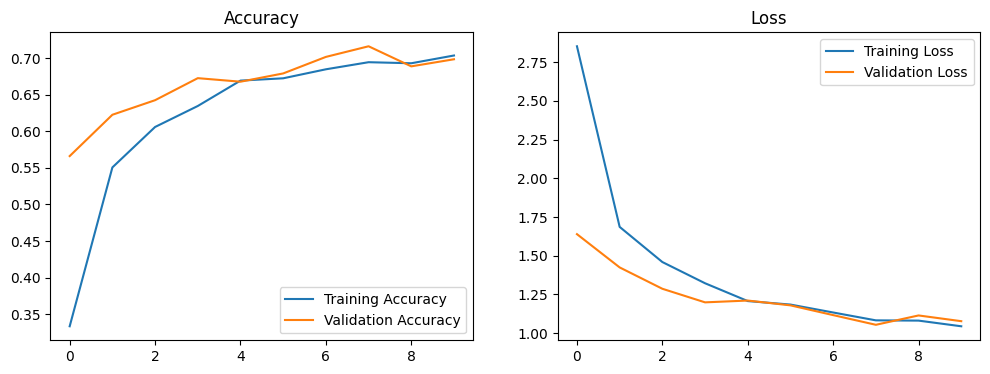

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os

# Define dataset paths
train_dir = r"E:\WINTER SEMESTER 24-45\DIGITAL IMAGE PROCESSING\archive\train"
test_dir = r"E:\WINTER SEMESTER 24-45\DIGITAL IMAGE PROCESSING\archive\test"

# Define image size and batch size
img_size = (224, 224)  # Increased size for better feature extraction
batch_size = 32

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],  # Adjust brightness
    validation_split=0.2  # Splitting dataset for validation
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Get class labels
class_names = list(train_generator.class_indices.keys())
print("Classes:", class_names)

# Load Pretrained MobileNetV2 Model (Transfer Learning)
base_model = keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze pretrained layers

# Build the Improved Model
model = keras.Sequential([
    base_model,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),  # Helps prevent overfitting
    keras.layers.Dense(len(class_names), activation='softmax')
])

# Compile the Model with Learning Rate Scheduling
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model Summary
model.summary()

# Callbacks for Better Training
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# Train the Model
epochs = 10  # Increased epochs for better learning
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs,
    callbacks=[early_stopping, lr_scheduler]
)

# Plot Accuracy and Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

# Prediction Function
def predict_image(image_path):
    img = keras.preprocessing.image.load_img(image_path, target_size=img_size)
    img_array = keras.preprocessing.image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions)]
    return predicted_class

# Predicting on Test Images
def predict_test_images(test_dir):
    test_images = [os.path.join(test_dir, img) for img in os.listdir(test_dir) if img.endswith(('.png', '.jpg', '.jpeg'))]
    for img_path in test_images:
        print(f"Image: {img_path} -> Predicted Sport: {predict_image(img_path)}")

# Example usage (Uncomment to test on images)



In [7]:
# Save the trained model
model.save("sports_model.h5")
print("Model saved successfully!")

Model saved successfully!
